## Forelesning 2: Plotting og datahåndtering
I denne forelesningen skal vi se på datavisualisering og datahåndtering.
- enkel plotting (med matplotlib og seaborn)
- lese datafiler (med pandas)
- rydde og visualisere data (med pandas)
- gjøre statistiske operasjoner på data (pandas og numpy)
- gjøre og tolke regresjon (numpy)

__Oppgave 1:__ Plott P som funksjon av V når T = 290 K, n = 1 mol og R = 8,314 J/(mol⋅K)

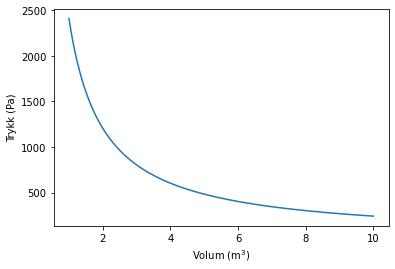

In [1]:
import matplotlib.pyplot as plt
import numpy as np

T = 290 # Temperatur i K
n = 1   # Stoffmengde i mol
R = 8.314 # Gasskonstanten i J/(molK)

V = np.linspace(1, 10, 10000) # Volum i m^3
P = n*R*T/V

plt.plot(V,P)
plt.xlabel("Volum (m$^3$)")
plt.ylabel("Trykk (Pa)")
plt.show()

Vi kan også plotte små datasett ved å benytte lister:

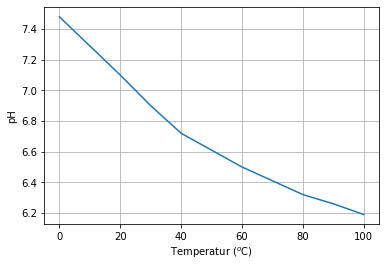

In [2]:
# pH i vann som funksjon av temperaturen i grader C
T = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
pH = [7.48, 7.29, 7.10, 6.90, 6.72, 6.61, 6.50, 6.41, 6.32, 6.26, 6.19]

plt.plot(T,pH)
plt.xlabel("Temperatur ($^o$C)")
plt.ylabel("pH")
plt.grid()
plt.show()

Store datafiler kan vi lese inn direkte, enten ved hjelp av basisfunksjonene i Python eller ved hjelp av biblioteker som _numpy_ og _pandas_.

## Pandas!

![](https://miro.medium.com/max/1400/0*1F2u74JQYI8sUuYg)

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h21/datafiler/periodesystemet.csv")

In [7]:
data.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AtomicNumber       118 non-null    int64  
 1   Element            118 non-null    object 
 2   Symbol             118 non-null    object 
 3   AtomicMass         118 non-null    float64
 4   NumberofNeutrons   118 non-null    int64  
 5   NumberofProtons    118 non-null    int64  
 6   NumberofElectrons  118 non-null    int64  
 7   Period             118 non-null    int64  
 8   Group              90 non-null     float64
 9   Phase              118 non-null    object 
 10  Radioactive        37 non-null     object 
 11  Natural            90 non-null     object 
 12  Metal              92 non-null     object 
 13  Nonmetal           19 non-null     object 
 14  Metalloid          7 non-null      object 
 15  Type               115 non-null    object 
 16  AtomicRadius       86 non-

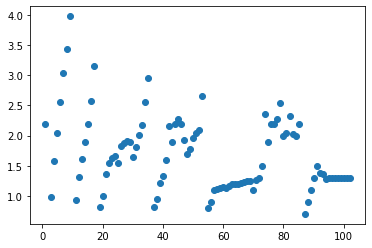

In [10]:
plt.scatter(data["AtomicNumber"], data["Electronegativity"])

In [6]:
data_high_elec = data[data["Electronegativity"] > 3]

In [7]:
data_high_elec.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
6,7,Nitrogen,N,14.007,7,7,7,2,15.0,gas,...,14.5341,0.00125,63.29,77.36,8.0,Rutherford,1772.0,1.040,2,5.0
7,8,Oxygen,O,15.999,8,8,8,2,16.0,gas,...,13.6181,0.00143,50.50,90.20,8.0,Priestley/Scheele,1774.0,0.918,2,6.0
8,9,Fluorine,F,18.998,10,9,9,2,17.0,gas,...,17.4228,0.00170,53.63,85.03,6.0,Moissan,1886.0,0.824,2,7.0
16,17,Chlorine,Cl,35.453,18,17,17,3,17.0,gas,...,12.9676,0.00321,172.31,239.11,11.0,Scheele,1774.0,0.479,3,7.0


In [15]:
data.describe()

,AtomicNumber,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,AtomicRadius,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Year,SpecificHeat,NumberofShells,NumberofValence
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,90.000000,86.000000,96.000000,102.000000,105.000000,98.000000,98.000000,103.000000,107.000000,85.000000,118.000000,49.000000
mean,59.500000,145.988297,86.483051,59.500000,59.500000,5.254237,9.944444,1.825814,1.695000,7.988505,9.232161,1281.475184,2513.143163,28.116505,1865.280374,0.635976,5.254237,4.428571
std,34.207699,88.954899,54.785320,34.207699,34.207699,1.618200,5.597674,0.611058,0.621174,3.334571,8.630406,903.685175,1601.901036,35.864205,97.951740,1.653965,1.618200,2.345208
min,1.000000,1.007000,0.000000,1.000000,1.000000,1.000000,1.000000,0.490000,0.700000,3.893900,0.000090,14.175000,4.220000,3.000000,1250.000000,0.094000,1.000000,1.000000
25%,30.250000,66.465750,36.000000,30.250000,30.250000,4.000000,5.000000,1.425000,1.237500,6.004850,2.700000,510.695000,1069.000000,11.000000,1803.500000,0.168000,4.000000,2.000000
50%,59.500000,142.575000,83.000000,59.500000,59.500000,6.000000,10.500000,1.800000,1.585000,6.960250,7.290000,1204.150000,2767.000000,19.000000,1878.000000,0.244000,6.000000,4.000000
75%,88.750000,226.750000,138.000000,88.750000,88.750000,7.000000,15.000000,2.200000,2.062500,8.964925,12.000000,1811.150000,3596.750000,24.000000,1940.000000,0.489000,7.000000,6.000000
max,118.000000,295.000000,178.000000,118.000000,118.000000,7.000000,18.000000,3.300000,3.980000,24.587400,41.000000,3948.150000,5869.000000,203.000000,2010.000000,14.304000,7.000000,8.000000


In [16]:
data["CombinedPoint"] = data["BoilingPoint"] + data["MeltingPoint"]

In [18]:
data.pop("CombinedPoint")

0        34.455
1           NaN
2      2068.850
3      4302.150
4      6773.150
         ...   
113         NaN
114         NaN
115         NaN
116         NaN
117         NaN
Name: CombinedPoint, Length: 118, dtype: float64

In [19]:
data.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0


Menti: www.menti.com/wzruzmq8cw

## Visualisering

Seaborn-biblioteket er en utvidelse av matplotlib som gir tilgang til mange fine visualiseringer.

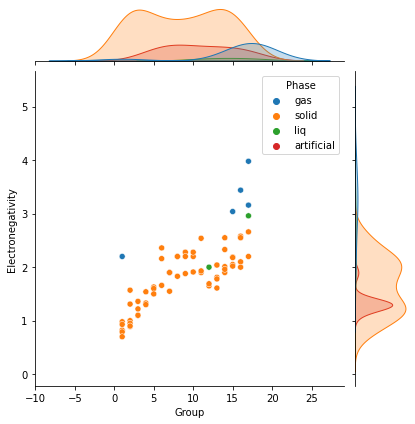

In [28]:
import seaborn as sns

sns.jointplot(data=data, x = "Group", y = "Electronegativity", hue= "Phase")

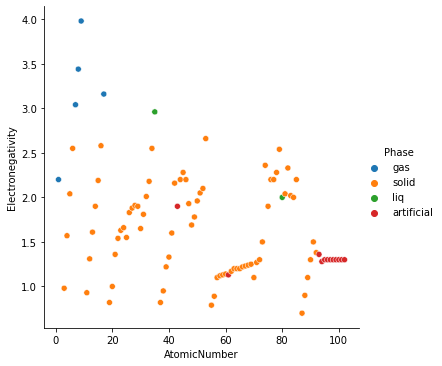

In [30]:
sns.relplot(data = data, x = "AtomicNumber", y = "Electronegativity", hue = "Phase")

Text(0, 0.5, 'Antall')

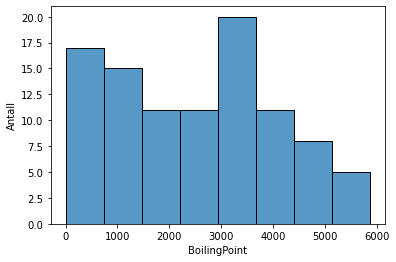

In [35]:
sns.histplot(data=data, x = "BoilingPoint", bins = 8)
plt.ylabel("Antall")

## Statistikk
- Interkvartilbredde.
- Gjennomsnitt.
- Varians ($\sigma^2$) og standardavvik ($\sigma$):

$$\sigma^2  = \frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2$$

$$\sigma  = \sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2}$$

In [40]:
import numpy as np

konsentrasjon = [2.00, 3.00, 3.03, 4.01, 4.00, 4.01, 5.00]
snitt = np.mean(konsentrasjon)
avvik = np.std(konsentrasjon)

print(round(snitt,2),"+-", round(avvik,6))

3.58 +- 0.90221


In [8]:
# Gjennomsnitt, median, varians og standardavvik av elektronegativitet
elneg = data["Electronegativity"]
elneg.mean()
elneg.median()
elneg.var()
elneg.std()

0.6211737616040001

## Regresjon

|     Temperatur (°C)     |     NH3, løselighet     (g/100 mL H$_2$O)     |     NaCl, Løselighet      (g/100 mL H$_2$O)     |
|-------------------------|--------------------------------------------|----------------------------------------------|
|     0                   |     88.5                                   |     35.7                                     |
|     20                  |     56.0                                   |     35.9                                     |
|     40                  |     34.0                                   |     36.4                                     |
|     60                  |     20.0                                   |     37.1                                     |
|     80                  |     11.0                                   |     38.0                                     |
|     100                 |     7.0                                    |     39.2                                     |

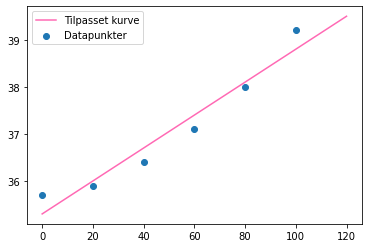

In [46]:
# La oss gjøre en regresjon
T = [0,20,40,60,80,100]
sol = [35.7, 35.9, 36.4, 37.1, 38, 39.2]

reg = np.polyfit(T,sol,1)
x = np.linspace(0,120,1000)
y = np.polyval(reg,x)

plt.scatter(T,sol,label="Datapunkter")
plt.plot(x,y,label="Tilpasset kurve",color="hotpink")
plt.legend()

Menti: https://www.menti.com/2sikjeo4ga